In [3]:
from scipy import signal

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [91]:
Vin = 20
Vout = 8.4
fs = 1e6
Lout=2.2e-6

In [92]:
duty = Vout/Vin
Ipp = (Vin-Vout)*duty/fs/Lout

In [93]:
print("dutycycle: %3.2f,  Ipp: %3.1f" % (duty, Ipp))

dutycycle: 0.42,  Ipp: 2.2


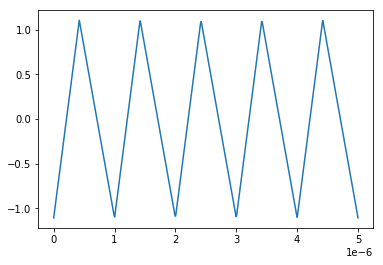

In [98]:
cycles=5
datapoints=np.linspace(0,1,500)
t=datapoints/fs*cycles
I_inductor=signal.sawtooth(2*np.pi*datapoints*cycles,duty)/2*Ipp
plt.plot(t,I_inductor)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [81]:
max(t2), max(I_inductor)

(2e-06, 1.1040590271451993)